# Exploración de Datos en Spotify - Shakira

En este notebook, autenticaremos con la API de Spotify y extraeremos datos sobre las pistas de Shakira.


ID del artista Shakira: 0EmeFodog0BfCgMzAIvKQp
Primeras 10 filas del dataset de Shakira:
                                                name  popularity  duration_ms  \
0                 Hips Don't Lie (feat. Wyclef Jean)          86       218093   
1                                                TQG          83       197933   
2                                       Dia de Enero          81       173133   
3                                          Antologia          79       254240   
4                                         Inevitable          79       192866   
5              Shakira: Bzrp Music Sessions, Vol. 53          78       214945   
6                                 Whenever, Wherever          61       197026   
7                            Chantaje (feat. Maluma)          78       195840   
8  Waka Waka (This Time for Africa) [The Official...          74       202466   
9       Can't Remember to Forget You (feat. Rihanna)          74       206866   

   danceability  en

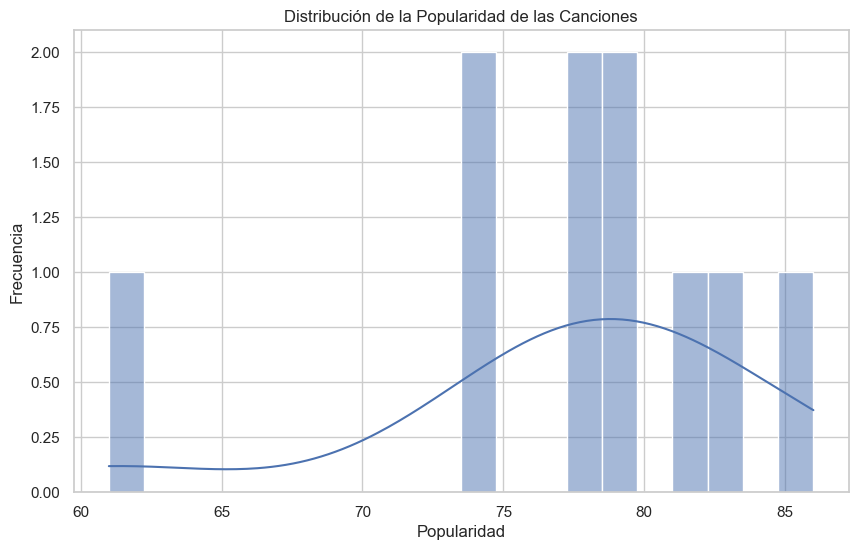

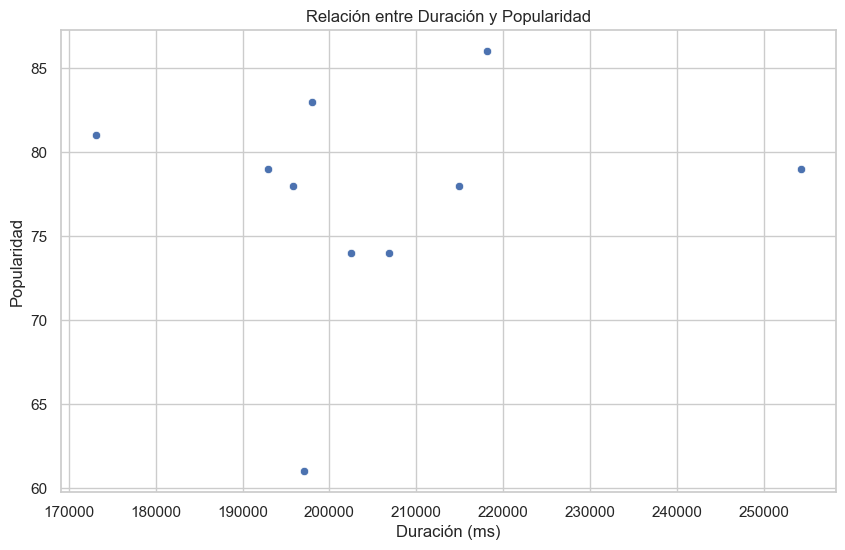

Estadísticas descriptivas:
       popularity    duration_ms  danceability     energy        key  \
count    10.00000      10.000000     10.000000  10.000000  10.000000   
mean     77.30000  205340.800000      0.743100   0.674200   6.300000   
std       6.79951   21249.369532      0.098229   0.195324   4.295993   
min      61.00000  173133.000000      0.587000   0.361000   0.000000   
25%      75.00000  196136.500000      0.688750   0.507500   2.500000   
50%      78.50000  200199.500000      0.771000   0.759000   7.000000   
75%      80.50000  212925.250000      0.827500   0.820500  10.000000   
max      86.00000  254240.000000      0.852000   0.887000  11.000000   

        loudness       mode  speechiness  acousticness  instrumentalness  \
count  10.000000  10.000000    10.000000     10.000000         10.000000   
mean   -6.136800   0.300000     0.097190      0.288587          0.000023   
std     3.101447   0.483046     0.090307      0.174630          0.000046   
min   -11.589000   0

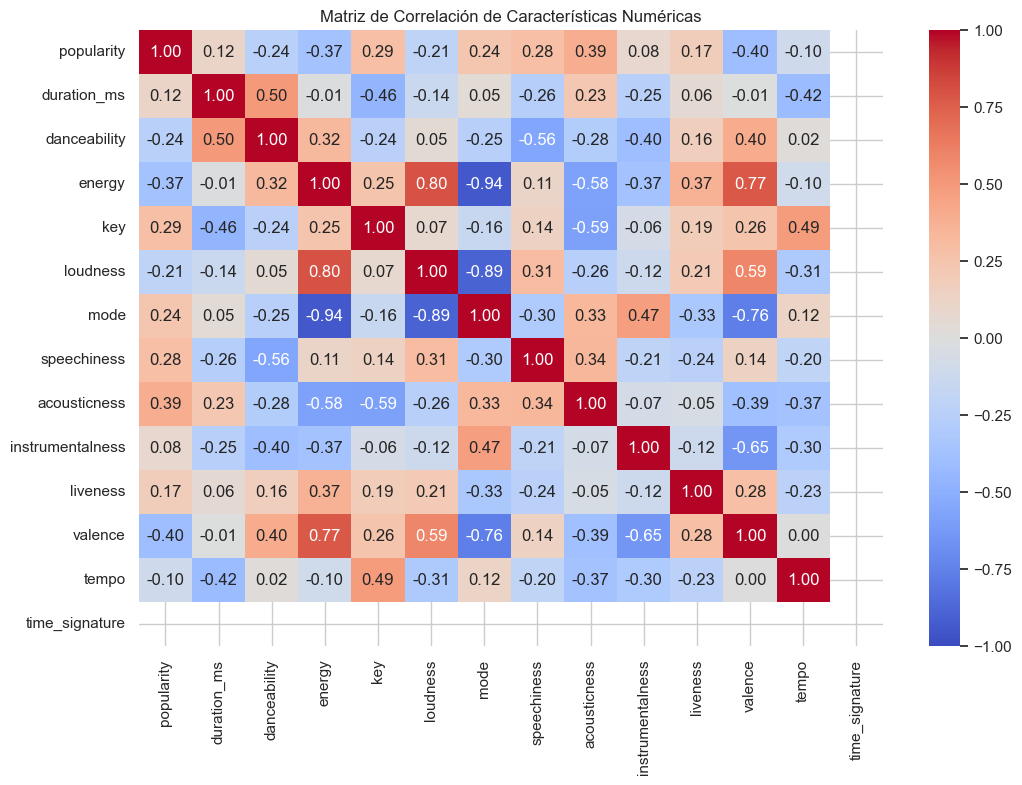

name                0
popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64
Error Cuadrático Medio: 14.71
R^2 Score: 0.27
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Error Cuadrático Medio con el mejor modelo: 22.62
R^2 Score con el mejor modelo: -0.12


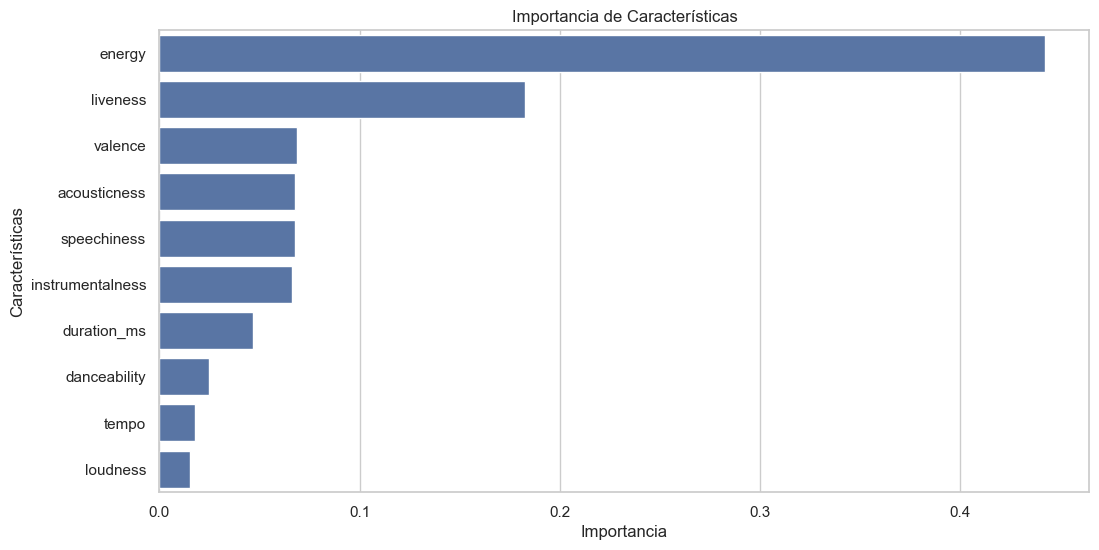

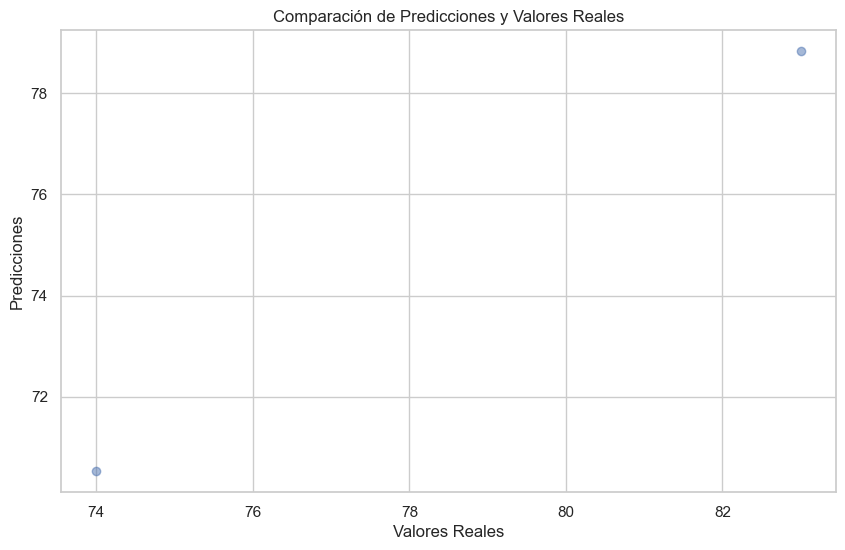

['model/random_forest_model.pkl']

In [41]:
# Importar librerías necesarias
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Credenciales de la aplicación
client_id = '280ff78d698c482aac1586e0c8bd24b9'
client_secret = '952fc04cccaf40ea91793ad02e84eced'

# Configuración de autenticación
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Crear el directorio 'data' si no existe
if not os.path.exists('data'):
    os.makedirs('data')

# Buscar el artista "Shakira"
results = sp.search(q='Shakira', type='artist')
artist_id = results['artists']['items'][0]['id']
print(f"ID del artista Shakira: {artist_id}")

# Obtener pistas del artista
def get_tracks(artist_id):
    tracks = []
    results = sp.artist_top_tracks(artist_id)
    for track in results['tracks']:
        track_info = {
            'name': track['name'],
            'popularity': track['popularity'],
            'duration_ms': track['duration_ms'],
            'danceability': sp.audio_features(track['id'])[0]['danceability'],
            'energy': sp.audio_features(track['id'])[0]['energy'],
            'key': sp.audio_features(track['id'])[0]['key'],
            'loudness': sp.audio_features(track['id'])[0]['loudness'],
            'mode': sp.audio_features(track['id'])[0]['mode'],
            'speechiness': sp.audio_features(track['id'])[0]['speechiness'],
            'acousticness': sp.audio_features(track['id'])[0]['acousticness'],
            'instrumentalness': sp.audio_features(track['id'])[0]['instrumentalness'],
            'liveness': sp.audio_features(track['id'])[0]['liveness'],
            'valence': sp.audio_features(track['id'])[0]['valence'],
            'tempo': sp.audio_features(track['id'])[0]['tempo'],
            'time_signature': sp.audio_features(track['id'])[0]['time_signature']
        }
        tracks.append(track_info)
    return pd.DataFrame(tracks)

# Obtener los datos
df_shakira = get_tracks(artist_id)

# Guardar los datos en un archivo CSV
df_shakira.to_csv('data/shakira_tracks.csv', index=False)

# Mostrar las primeras filas
print("Primeras 10 filas del dataset de Shakira:")
print(df_shakira.head(10))

# Configuración para gráficos
sns.set(style="whitegrid")

# Distribución de la popularidad
plt.figure(figsize=(10, 6))
sns.histplot(df_shakira['popularity'], bins=20, kde=True)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre la duración y la popularidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_shakira, x='duration_ms', y='popularity')
plt.title('Relación entre Duración y Popularidad')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.show()

# Cargar el archivo CSV (asegúrate de haber guardado el CSV correctamente)
df_shakira = pd.read_csv('data/shakira_tracks.csv')

# Estadísticas descriptivas para columnas numéricas
print("Estadísticas descriptivas:")
print(df_shakira.describe(include=[float, int]))

# Filtrar solo las columnas numéricas
df_numeric = df_shakira.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

# Verificar datos faltantes
print(df_shakira.isnull().sum())

# Normalización de datos
scaler = StandardScaler()
features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
             'instrumentalness', 'liveness', 'valence', 'tempo']
df_shakira[features] = scaler.fit_transform(df_shakira[features])

# Definir características (X) y variable objetivo (y)
X = df_shakira[features]
y = df_shakira['popularity']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f'Error Cuadrático Medio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')

# Definir parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

# Mejor parámetros y rendimiento
print(f"Mejores parámetros: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f'Error Cuadrático Medio con el mejor modelo: {mean_squared_error(y_test, y_pred_best):.2f}')
print(f'R^2 Score con el mejor modelo: {r2_score(y_test, y_pred_best):.2f}')

# Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Comparación de Predicciones y Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones y Valores Reales')
plt.show()

# Crear el directorio 'model' si no existe
if not os.path.exists('model'):
    os.makedirs('model')

# Guardar el modelo entrenado
joblib.dump(best_model, 'model/random_forest_model.pkl')

# Cargar el modelo entrenado
# model = joblib.load('model/random_forest_model.pkl')
